<div style="background-color: #ffdd99; padding: 15px; text-align: center; border-radius: 5px;">
  <h2> 🚧 Work in Progress 🚧 </h2> 
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')

In [2]:
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [3]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


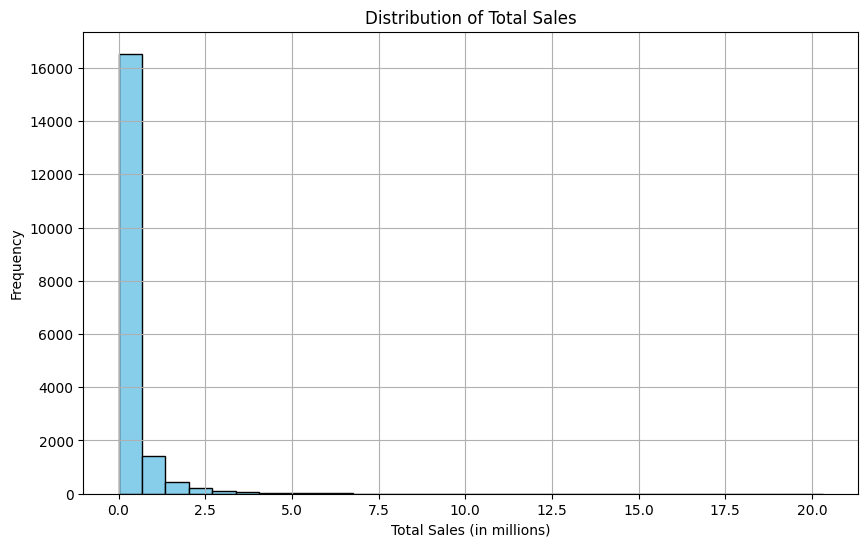

In [5]:
df_filtered = df[df['total_sales'].notnull()]
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['total_sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Sales Trends Over Time

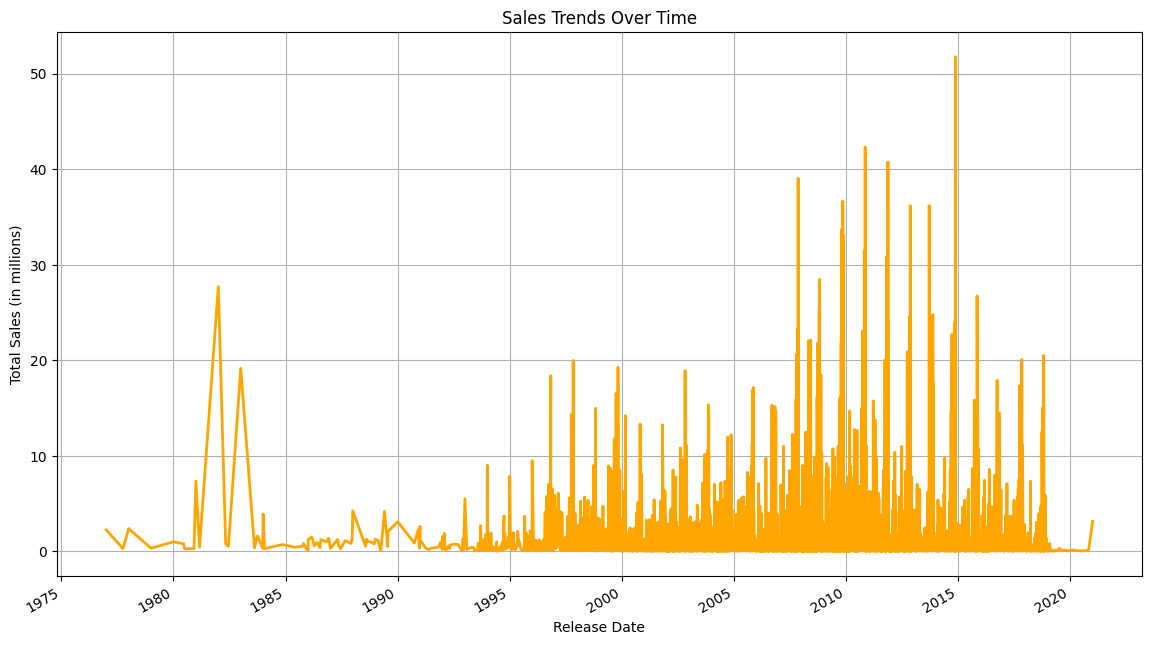

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_filtered_time = df[df['release_date'].notnull() & df['total_sales'].notnull()]
sales_trends = df_filtered_time.groupby('release_date')['total_sales'].sum()
plt.figure(figsize=(14, 8))
sales_trends.plot(linewidth=2, color='orange')
plt.title('Sales Trends Over Time')
plt.xlabel('Release Date')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()


## Total Sales Comparison Across Regions

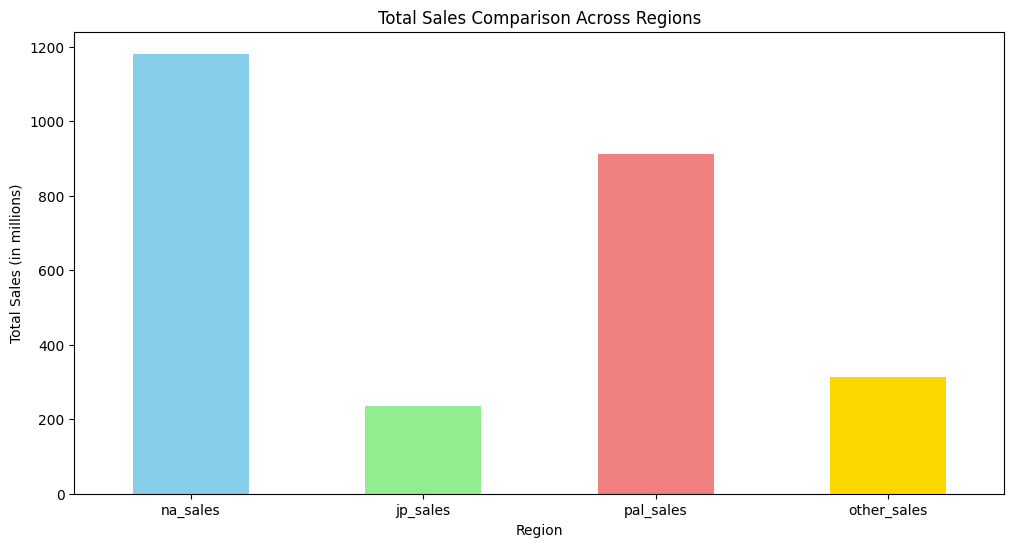

In [7]:
df_filtered_regions = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].dropna()
total_sales_by_region = df_filtered_regions.sum()
plt.figure(figsize=(12, 6))
total_sales_by_region.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Total Sales Comparison Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.show()


## Top Selling Games

In [8]:
top_selling_games = df.sort_values(by='total_sales', ascending=False)

top_n = 10
top_selling_games = top_selling_games.head(top_n)
print("Top Selling Games:")
print(top_selling_games[['title', 'total_sales']])

Top Selling Games:
                            title  total_sales
0              Grand Theft Auto V        20.32
1              Grand Theft Auto V        19.39
2     Grand Theft Auto: Vice City        16.15
3              Grand Theft Auto V        15.86
4       Call of Duty: Black Ops 3        15.09
5  Call of Duty: Modern Warfare 3        14.82
6         Call of Duty: Black Ops        14.74
7           Red Dead Redemption 2        13.94
8      Call of Duty: Black Ops II        13.86
9      Call of Duty: Black Ops II        13.80


# Critic Score Analysis

## Distribution of Critic Scores

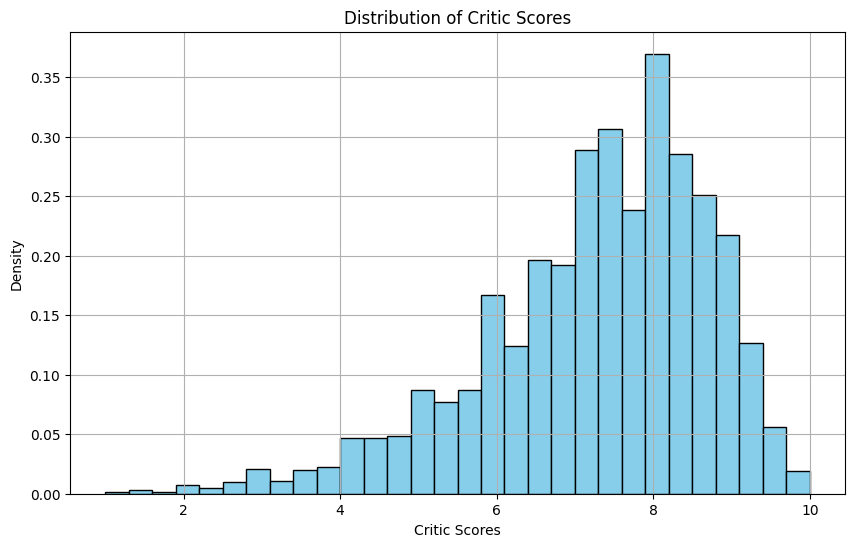

In [9]:

df_filtered_scores = df['critic_score'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_scores, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Scores')
plt.ylabel('Density')
plt.grid(True)
plt.show()


## Relationship Between Critic Scores and Total Sales

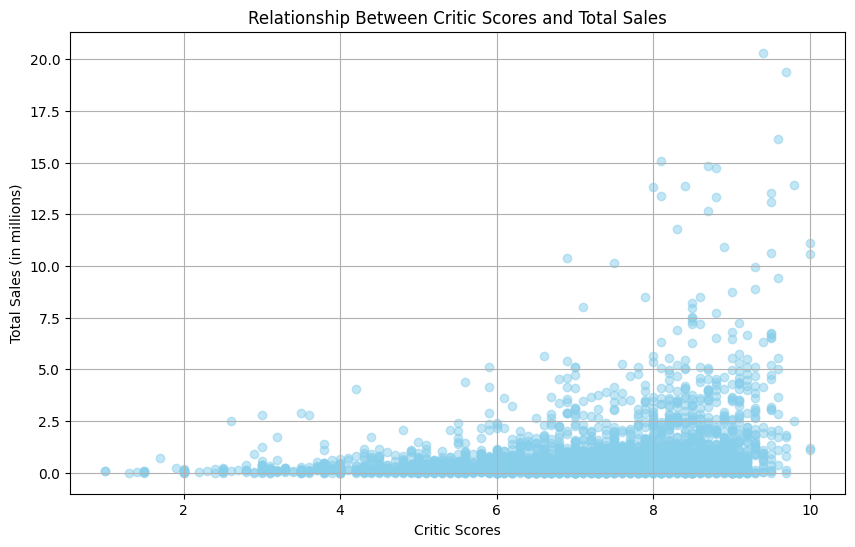

In [10]:
df_filtered_relationship = df[['critic_score', 'total_sales']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_relationship['critic_score'], df_filtered_relationship['total_sales'], color='skyblue', alpha=0.5)
plt.title('Relationship Between Critic Scores and Total Sales')
plt.xlabel('Critic Scores')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()


# Genre Analysis:


## Most Popular Genres

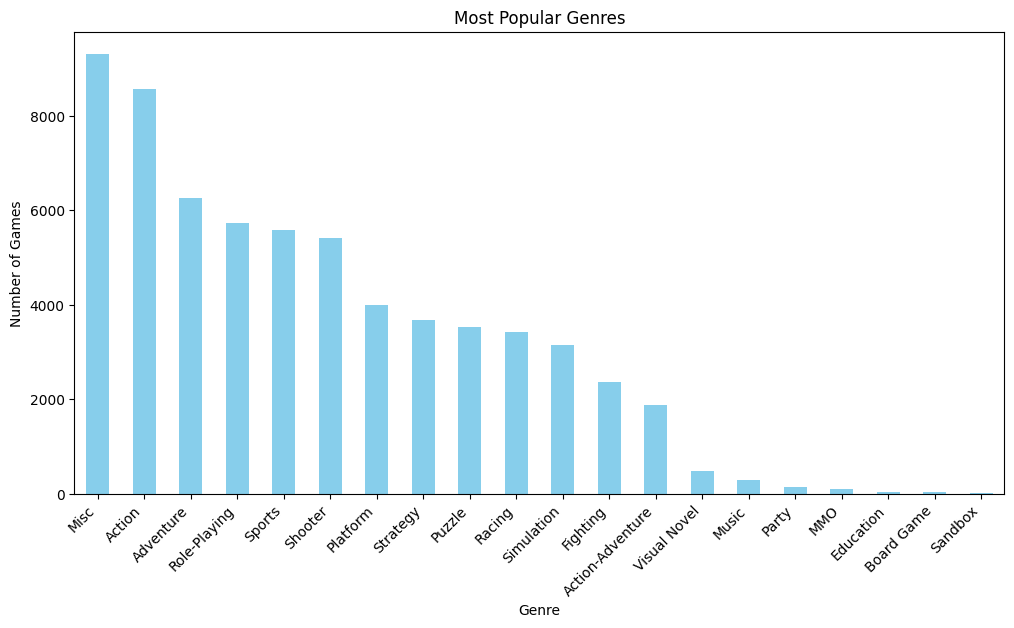

In [11]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()


## Sales Distribution by Genre

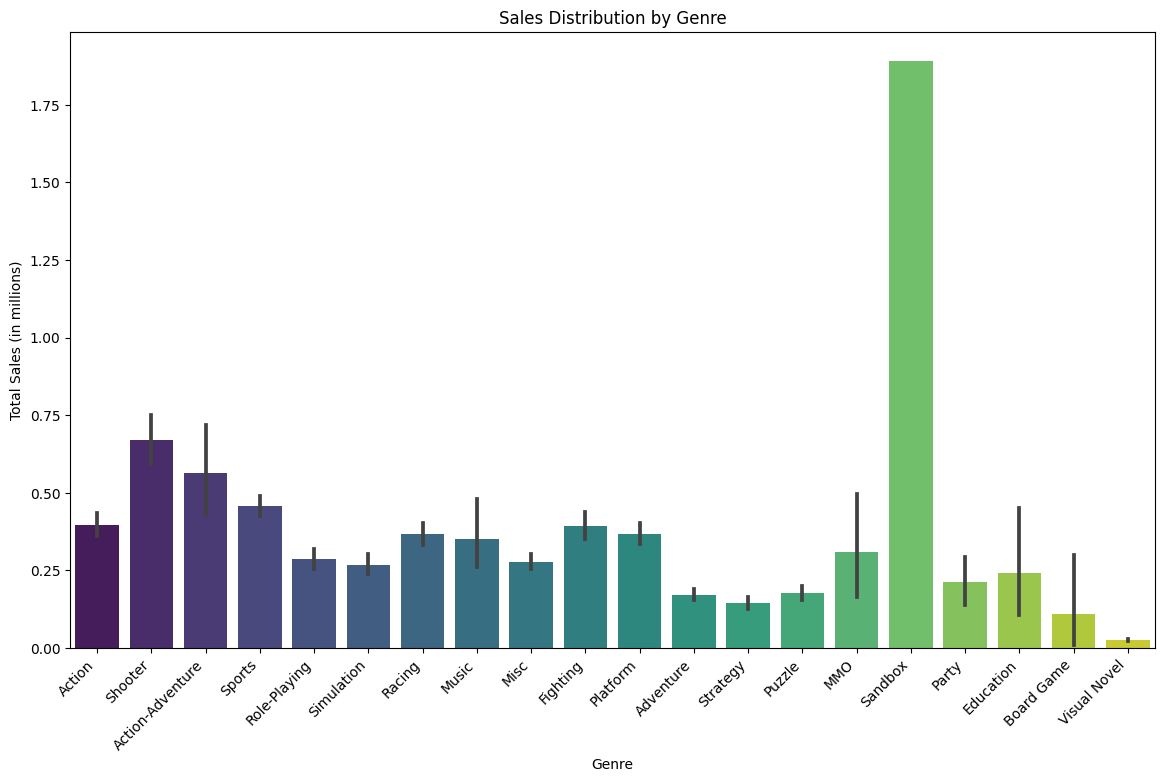

In [12]:
df_filtered_sales_genre = df[['total_sales', 'genre']].dropna()
plt.figure(figsize=(14, 8))
sns.barplot(x='genre', y='total_sales', data=df_filtered_sales_genre, palette='viridis')
plt.title('Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()


## Critic Scores by Genre

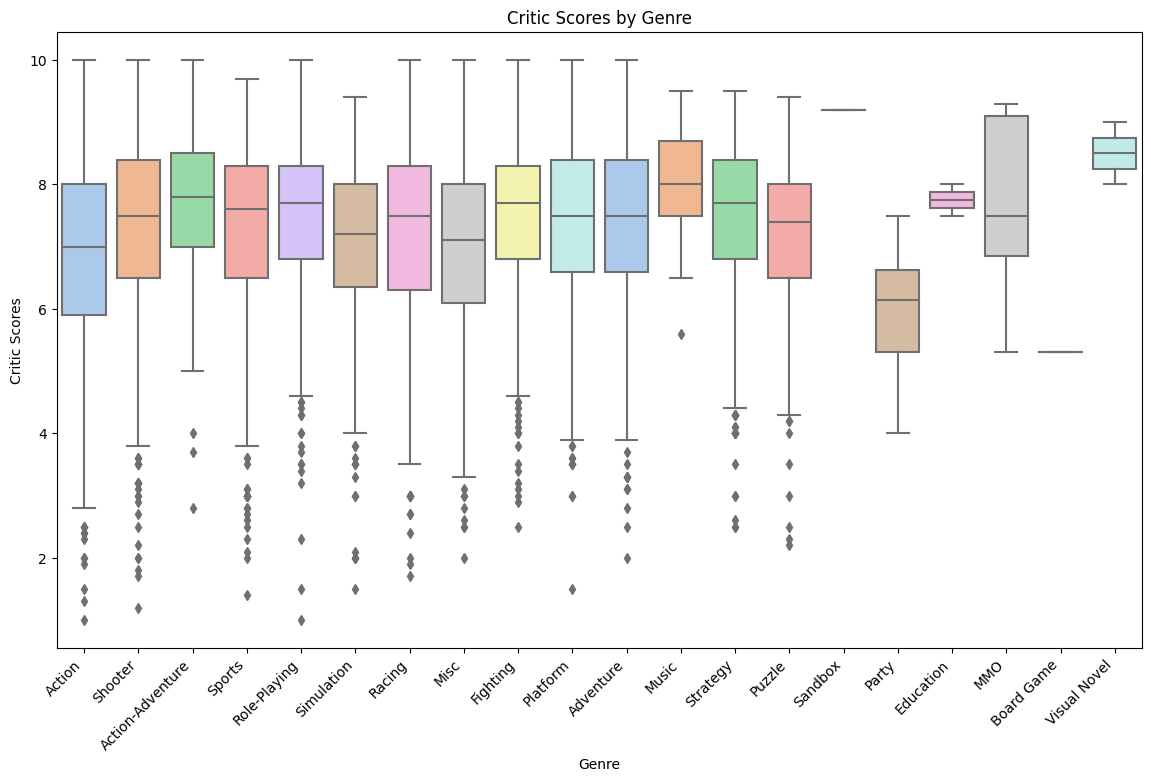

In [13]:
df_filtered_scores_genre = df[['critic_score', 'genre']].dropna()
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='critic_score', data=df_filtered_scores_genre, palette='pastel')
plt.title('Critic Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Critic Scores')
plt.xticks(rotation=45, ha='right')
plt.show()


# Console Analysis:

## Sales Distribution by Consol

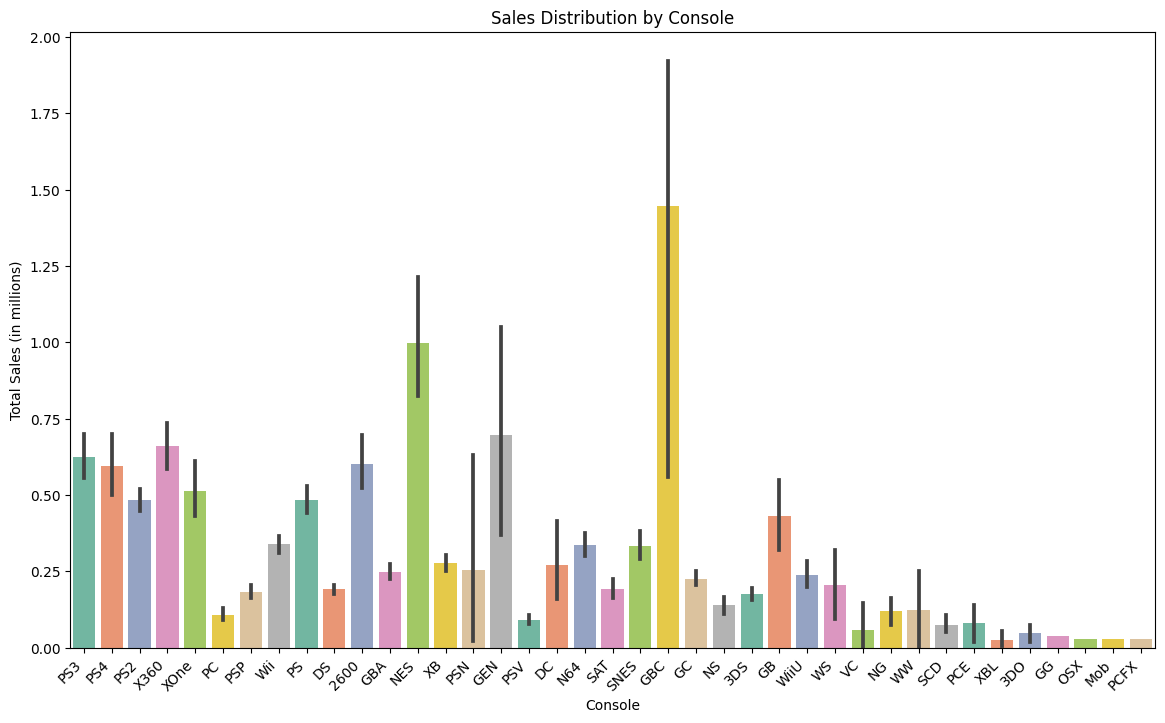

In [14]:
df_filtered_sales_console = df[['total_sales', 'console']].dropna()
plt.figure(figsize=(14, 8))
sns.barplot(x='console', y='total_sales', data=df_filtered_sales_console, palette='Set2')
plt.title('Sales Distribution by Console')
plt.xlabel('Console')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()


## Total Sales by Gaming Consol

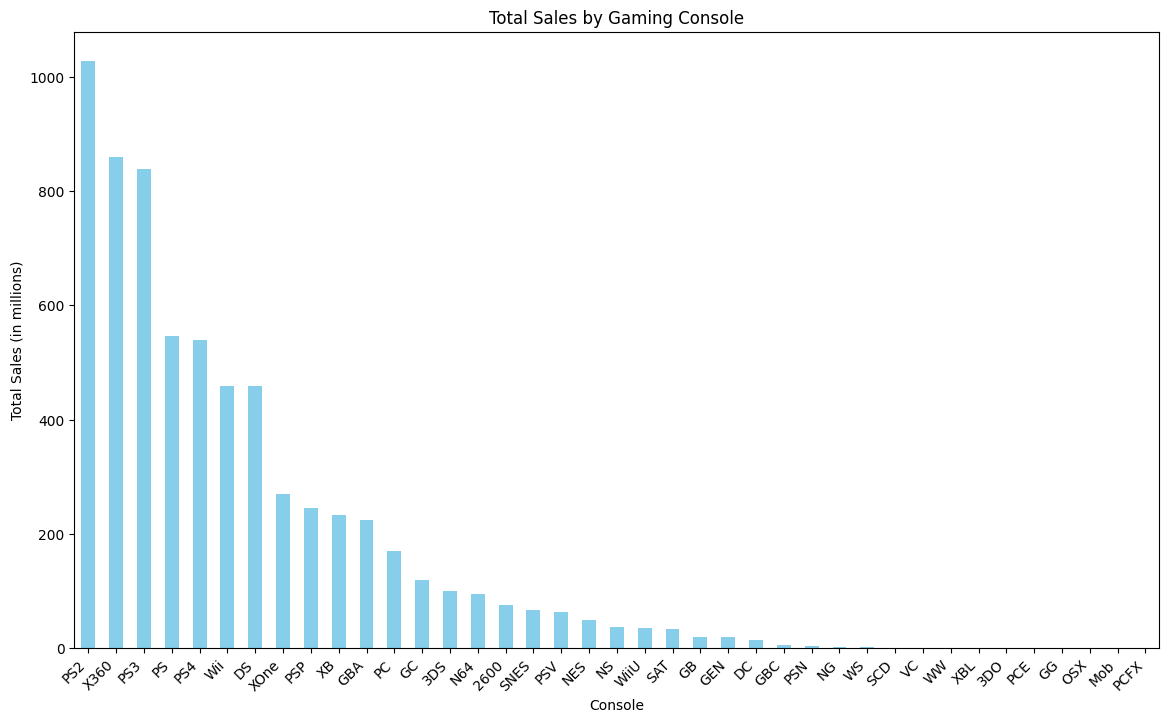

Most Successful Gaming Consoles:
console
PS2     1027.76
X360     859.79
PS3      839.70
PS       546.25
PS4      539.92
Name: total_sales, dtype: float64


In [15]:
df_filtered_console_sales = df[['total_sales', 'console']].dropna()
console_total_sales = df_filtered_console_sales.groupby('console')['total_sales'].sum()
sorted_consoles = console_total_sales.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sorted_consoles.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gaming Console')
plt.xlabel('Console')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()
most_successful_consoles = sorted_consoles.head(5)
print("Most Successful Gaming Consoles:")
print(most_successful_consoles)


# Publisher and Developer Analysis:

## Top Publishers | nTop Developer

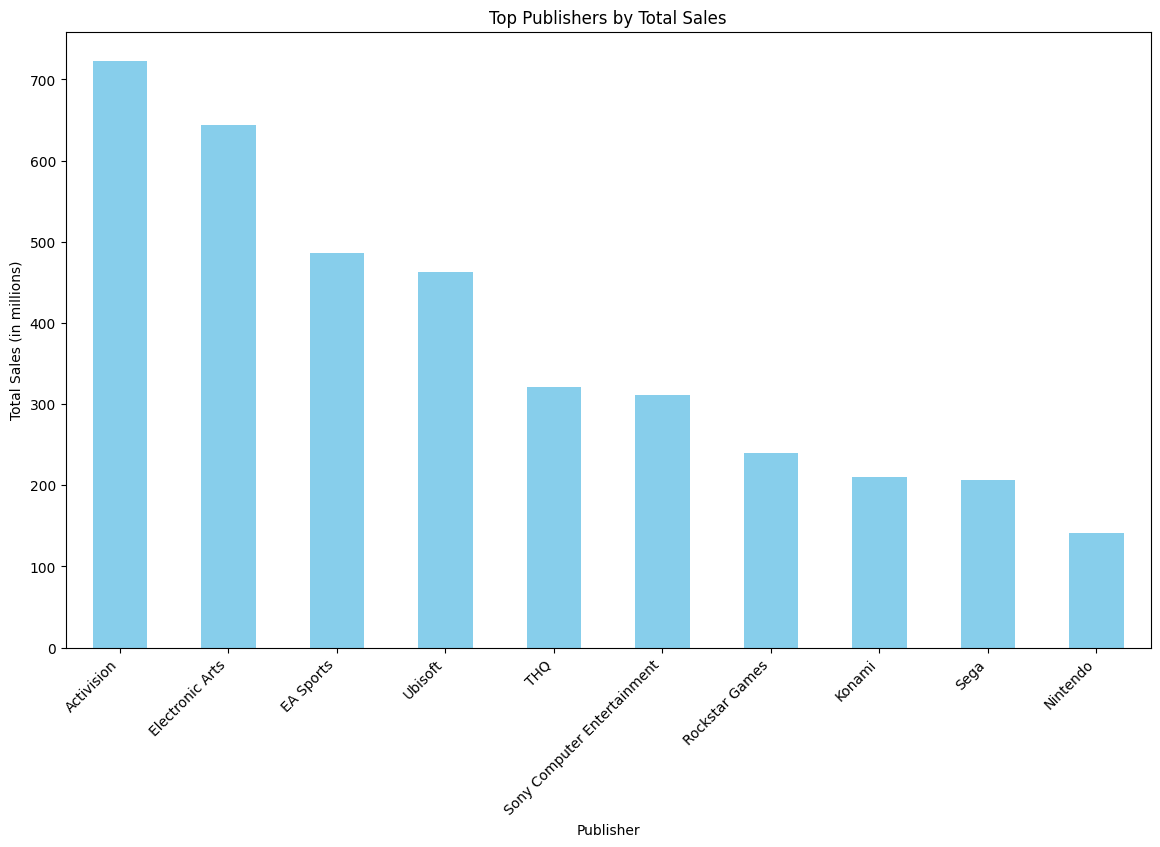

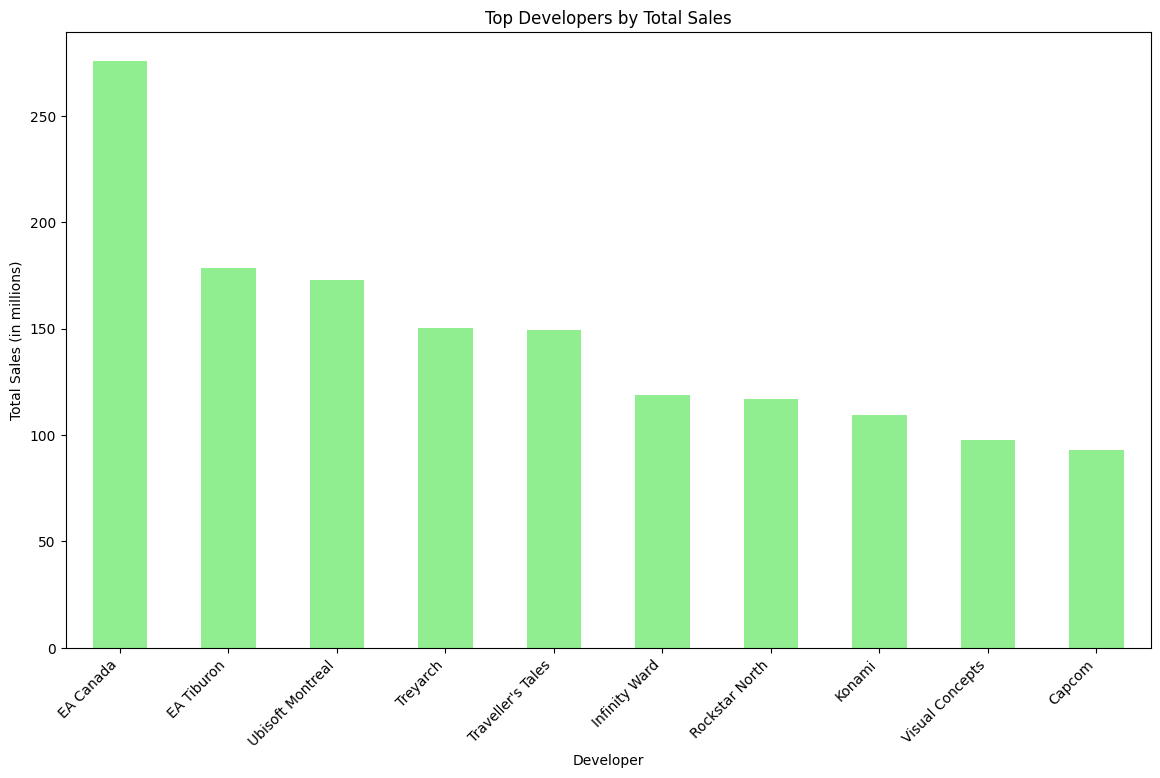

Top Publishers:
publisher
Activision         722.77
Electronic Arts    644.13
EA Sports          485.66
Ubisoft            462.43
THQ                320.89
Name: total_sales, dtype: float64

Top Developers:
developer
EA Canada            275.56
EA Tiburon           178.33
Ubisoft Montreal     172.96
Treyarch             150.19
Traveller's Tales    149.55
Name: total_sales, dtype: float64


In [16]:
import matplotlib.pyplot as plt
df_filtered_sales_publishers_developers = df[['total_sales', 'publisher', 'developer']].dropna()
publisher_total_sales = df_filtered_sales_publishers_developers.groupby('publisher')['total_sales'].sum()
developer_total_sales = df_filtered_sales_publishers_developers.groupby('developer')['total_sales'].sum()
sorted_publishers = publisher_total_sales.sort_values(ascending=False)
sorted_developers = developer_total_sales.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sorted_publishers.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Publishers by Total Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.figure(figsize=(14, 8))
sorted_developers.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top Developers by Total Sales')
plt.xlabel('Developer')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()
top_publishers = sorted_publishers.head(5)
top_developers = sorted_developers.head(5)

print("Top Publishers:")
print(top_publishers)

print("\nTop Developers:")
print(top_developers)


## Top Publishers by Total Sales

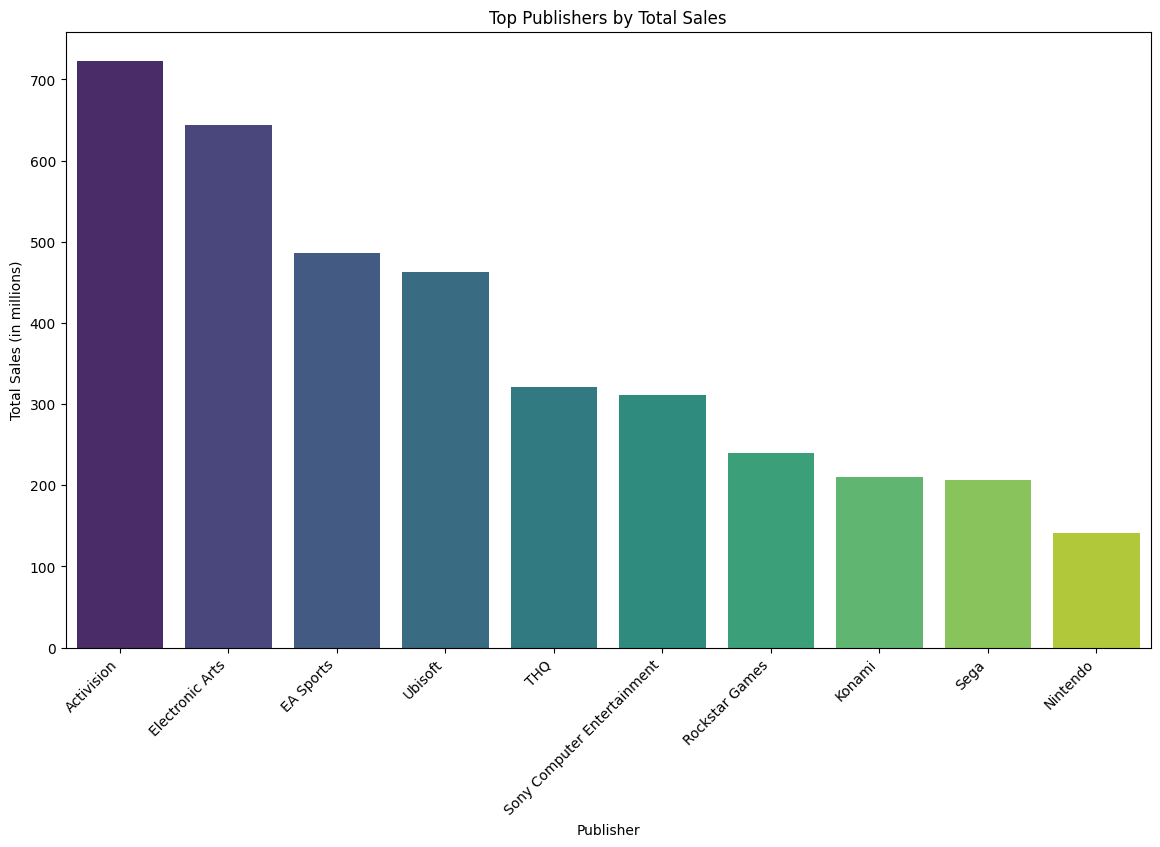

In [17]:
top_publishers_subset = sorted_publishers.head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_publishers_subset.index, y=top_publishers_subset.values, palette='viridis')
plt.title('Top Publishers by Total Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()


## Relationship Between Publisher and Total Sales

In [18]:
# df_filtered_sales_publisher_developer['publisher_group'] = df_filtered_sales_publisher_developer['publisher'].str[0]
# plt.figure(figsize=(14, 8))
# sns.scatterplot(x='publisher_group', y='total_sales', data=df_filtered_sales_publisher_developer, alpha=0.5)
# plt.title('Relationship Between Publisher and Total Sales')
# plt.xlabel('Publisher Group')
# plt.ylabel('Total Sales (in millions)')
# plt.show()


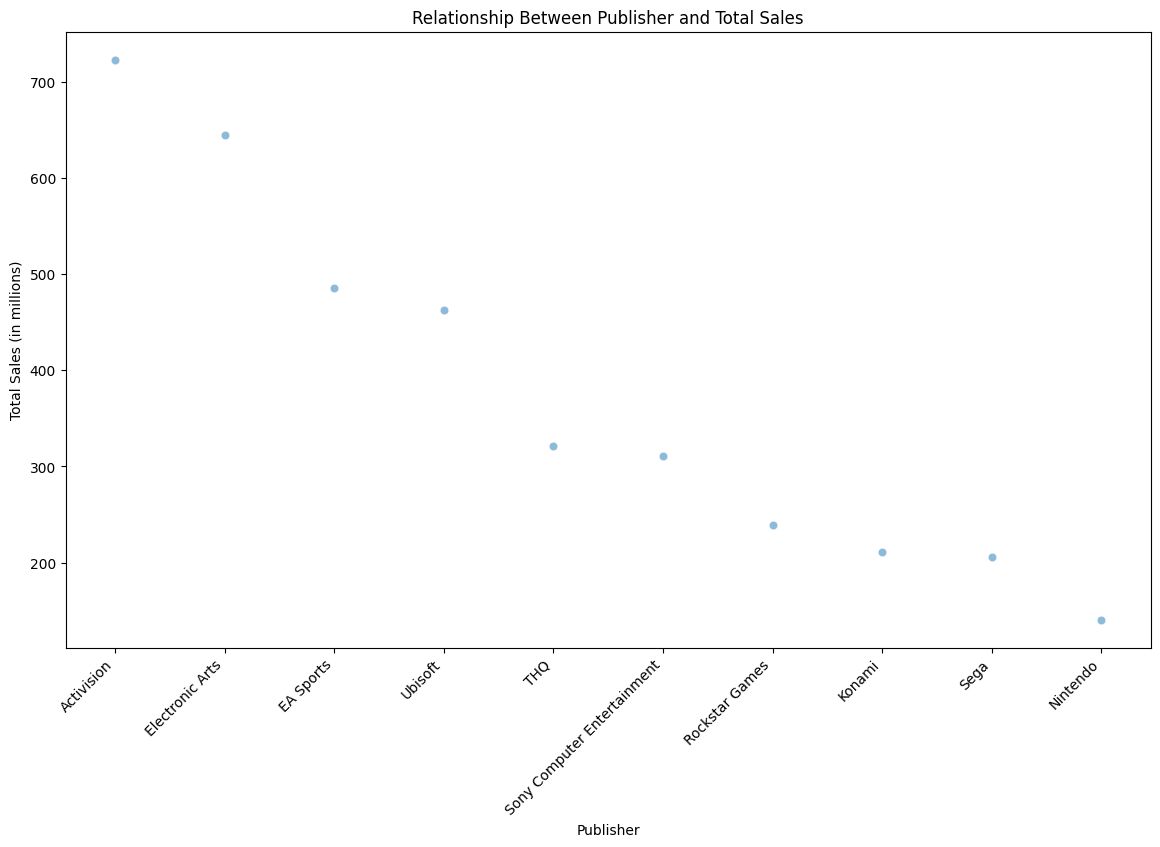

In [19]:
df_filtered_sales_publisher_developer = df[['total_sales', 'publisher', 'developer']].dropna()
publisher_total_sales = df_filtered_sales_publisher_developer.groupby('publisher')['total_sales'].sum()
sorted_publishers = publisher_total_sales.sort_values(ascending=False)
top_publishers_subset = sorted_publishers.head(10)
plt.figure(figsize=(14, 8))
sns.scatterplot(x=top_publishers_subset.index, y=top_publishers_subset.values, alpha=0.5)
plt.title('Relationship Between Publisher and Total Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()


# Time Trends:

## Relationship Between Publisher and Total Sales

/tmp/ipykernel_18/4099061423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_time['release_year'] = df_filtered_time['release_date'].dt.year


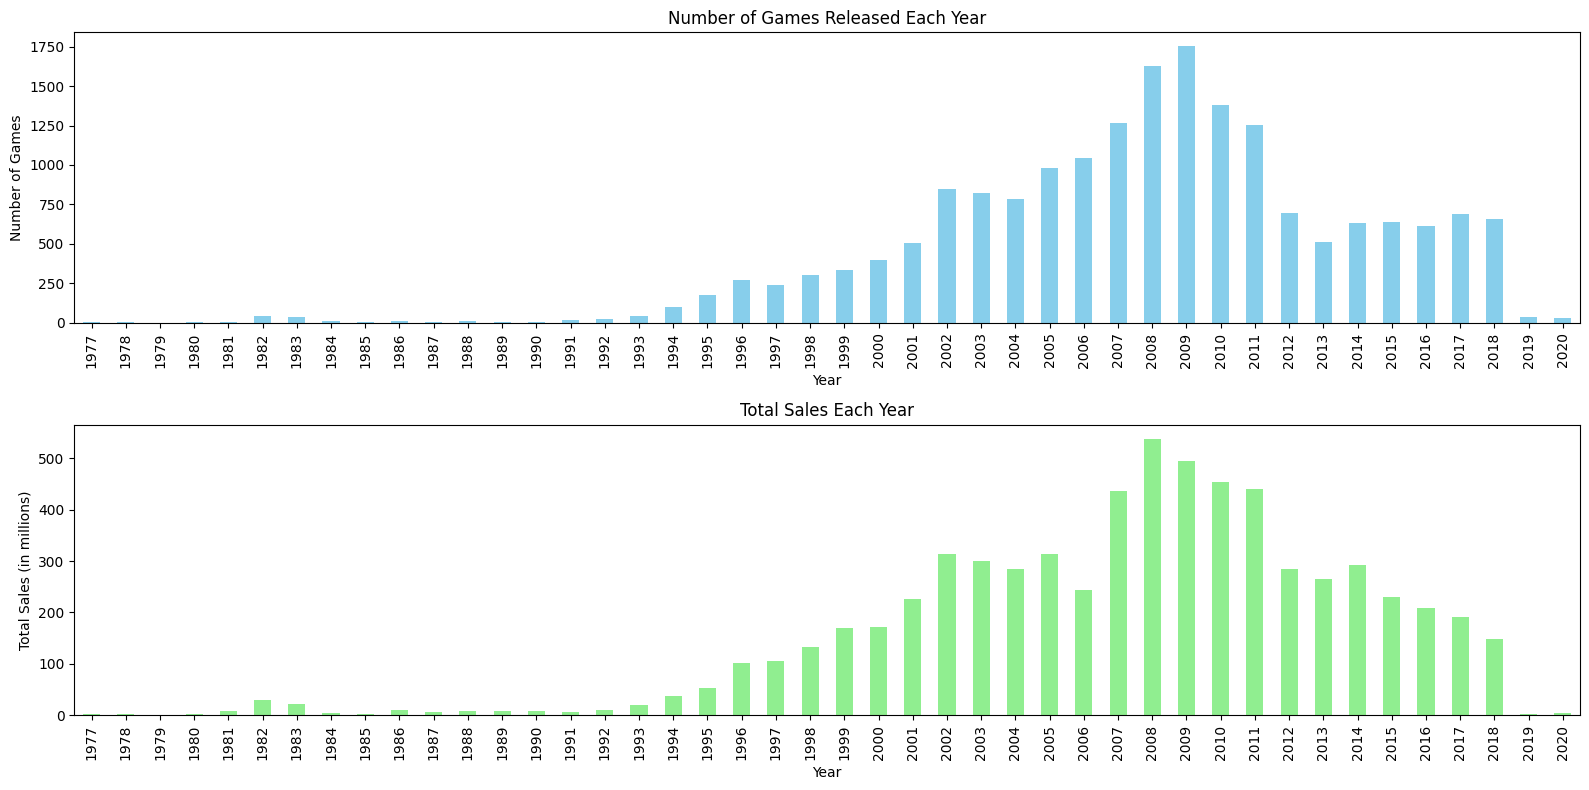

In [20]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_filtered_time = df[df['release_date'].notnull() & df['total_sales'].notnull()]
df_filtered_time['release_year'] = df_filtered_time['release_date'].dt.year
games_per_year = df_filtered_time.groupby('release_year')['title'].count()
sales_per_year = df_filtered_time.groupby('release_year')['total_sales'].sum()
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.subplot(2, 1, 2)
sales_per_year.plot(kind='bar', color='lightgreen')
plt.title('Total Sales Each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()


## Number of Games Released Each Month |Total Sales Each Month

/tmp/ipykernel_18/2274575759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_time['release_month'] = df_filtered_time['release_date'].dt.month_name()


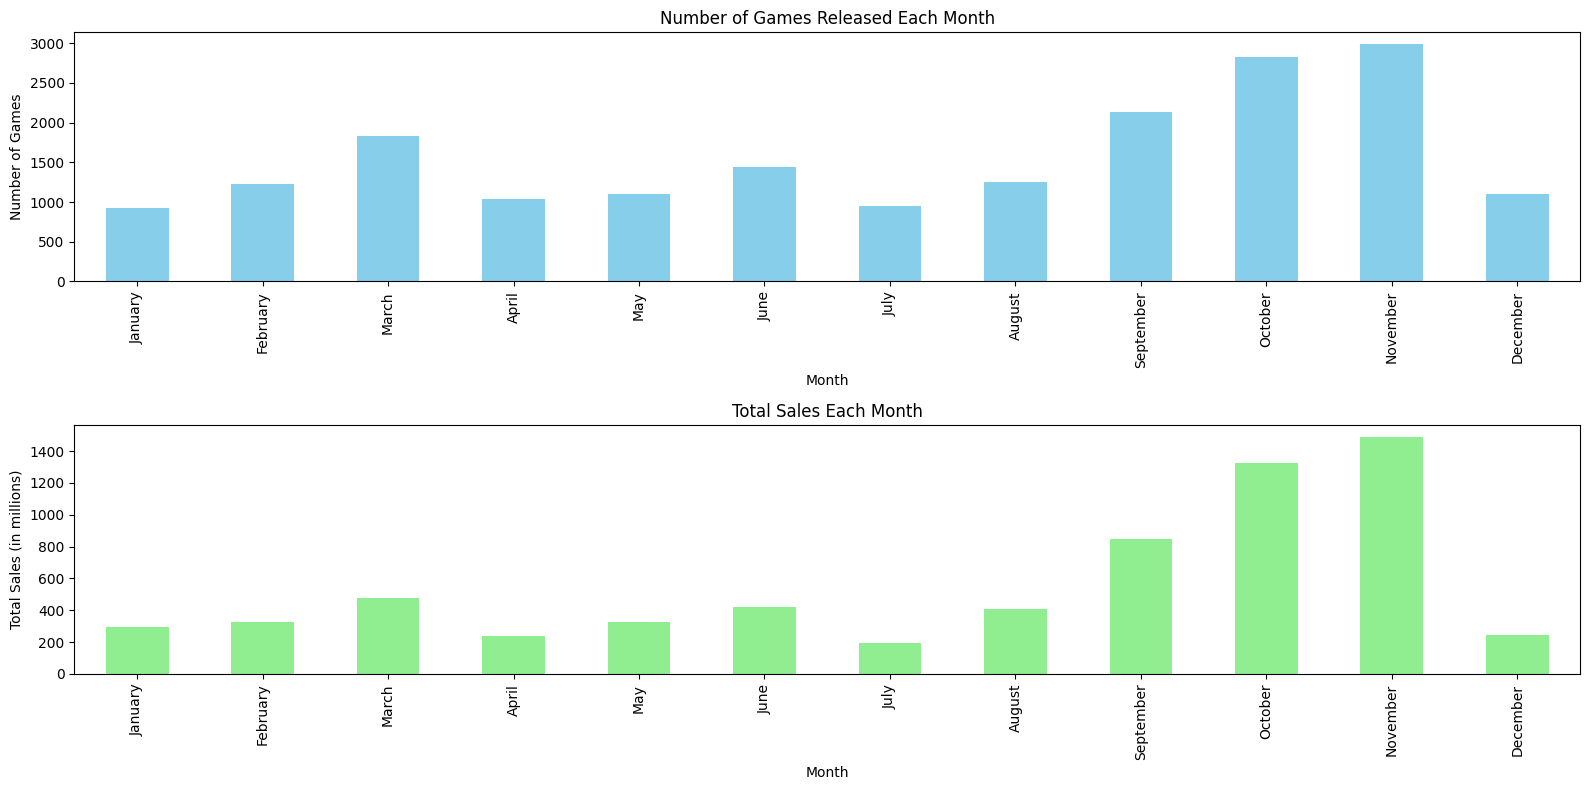

In [21]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_filtered_time = df[df['release_date'].notnull() & df['total_sales'].notnull()]
df_filtered_time['release_month'] = df_filtered_time['release_date'].dt.month_name()
games_per_month = df_filtered_time.groupby('release_month')['title'].count()
sales_per_month = df_filtered_time.groupby('release_month')['total_sales'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
games_per_month = games_per_month.reindex(months_order)
sales_per_month = sales_per_month.reindex(months_order)
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
games_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.subplot(2, 1, 2)
sales_per_month.plot(kind='bar', color='lightgreen')
plt.title('Total Sales Each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()


# Missing Data Analysis:

## Explore Missing Data Distribution

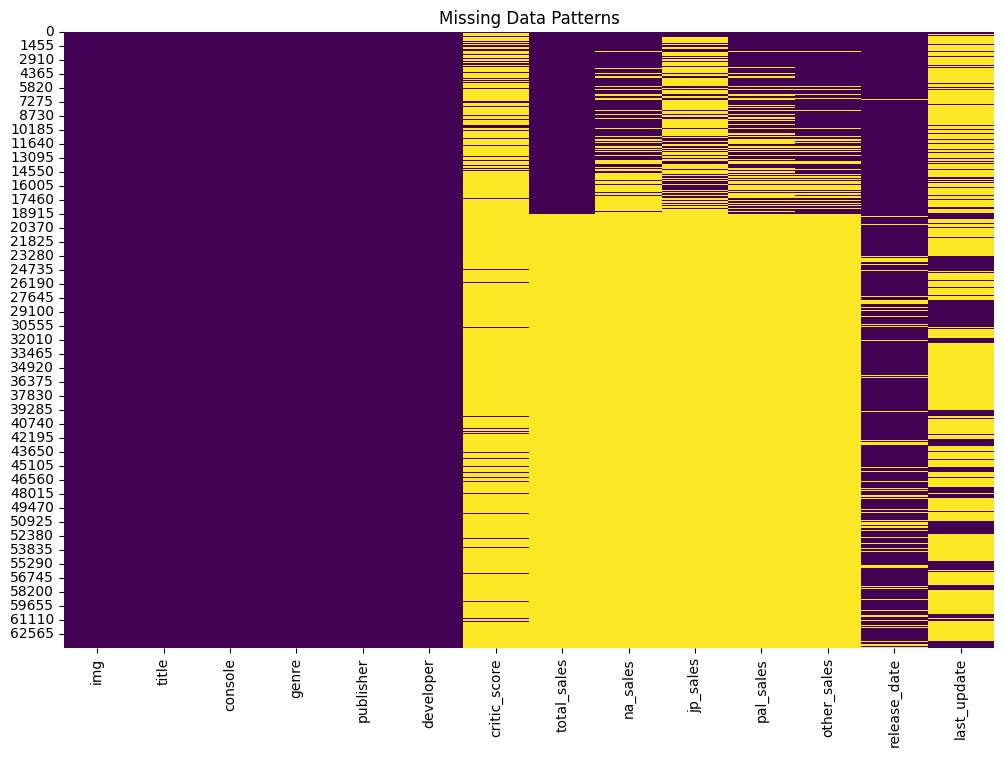


Rows with Missing Critic Scores:
                                  title console         genre  \
3                    Grand Theft Auto V    X360        Action   
23                               Halo 4    X360       Shooter   
25         Call of Duty: Black Ops IIII     PS4       Shooter   
26                              FIFA 19     PS4        Sports   
33                              FIFA 13     PS3        Sports   
...                                 ...     ...           ...   
64011             XBlaze Lost: Memories      PC  Visual Novel   
64012                      Yoru, Tomosu     PS4  Visual Novel   
64013                      Yoru, Tomosu      NS  Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS  Visual Novel   
64015  Yurukill: The Calumniation Games     PS4  Visual Novel   

                  publisher             developer release_date  total_sales  
3            Rockstar Games        Rockstar North   2013-09-17        15.86  
23        Microsoft Studios  

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data patterns using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Patterns')
plt.show()

# Explore rows with missing values in the 'critic_score' column
missing_critic_score = df[df['critic_score'].isnull()]
print("\nRows with Missing Critic Scores:")
print(missing_critic_score[['title', 'console', 'genre', 'publisher', 'developer', 'release_date', 'total_sales']])

# Explore rows with missing values in the 'release_date' column
missing_release_date = df[df['release_date'].isnull()]
print("\nRows with Missing Release Dates:")
print(missing_release_date[['title', 'console', 'genre', 'publisher', 'developer', 'critic_score', 'total_sales']])


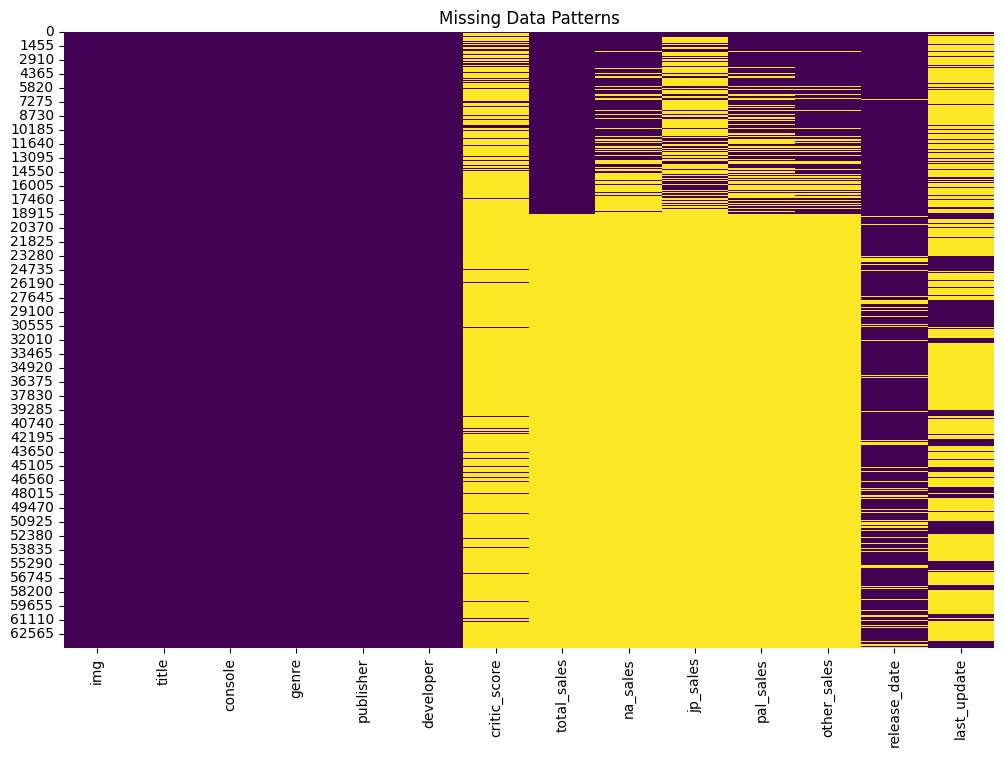

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Patterns')
plt.show()


##  Compare Characteristics of Missing and Non-Missing Groups:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


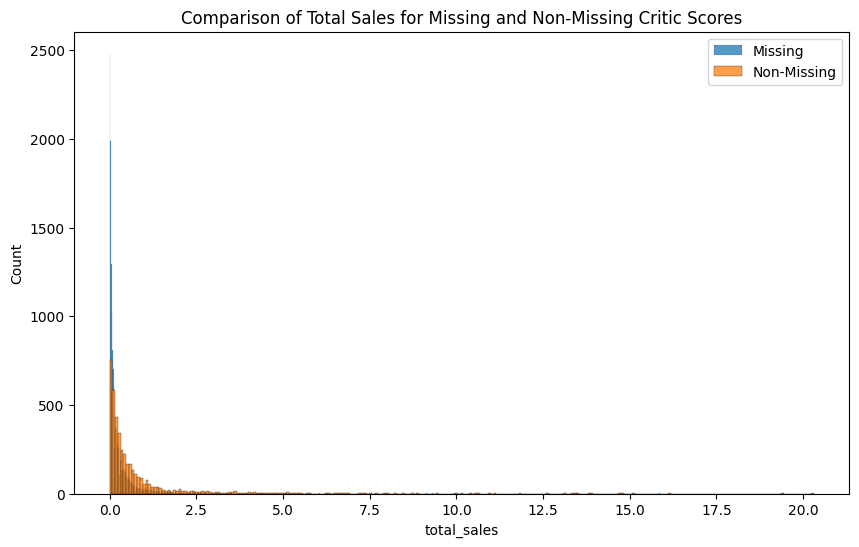

In [24]:
missing_critic_score = df[df['critic_score'].isnull()]
non_missing_critic_score = df[df['critic_score'].notnull()]
plt.figure(figsize=(10, 6))
sns.histplot(missing_critic_score['total_sales'], label='Missing')
sns.histplot(non_missing_critic_score['total_sales'], label='Non-Missing')
plt.title('Comparison of Total Sales for Missing and Non-Missing Critic Scores')
plt.legend()
plt.show()


## Test for Missingness Mechanisms:
Impute and Compare:


In [25]:
from sklearn.impute import SimpleImputer

# Example: Impute missing values in 'critic_score' with mean
imputer = SimpleImputer(strategy='mean')
df['critic_score_imputed'] = imputer.fit_transform(df[['critic_score']])


# Correlation Analysis:

##  Identify factors that might be strongly correlated with high sales. 

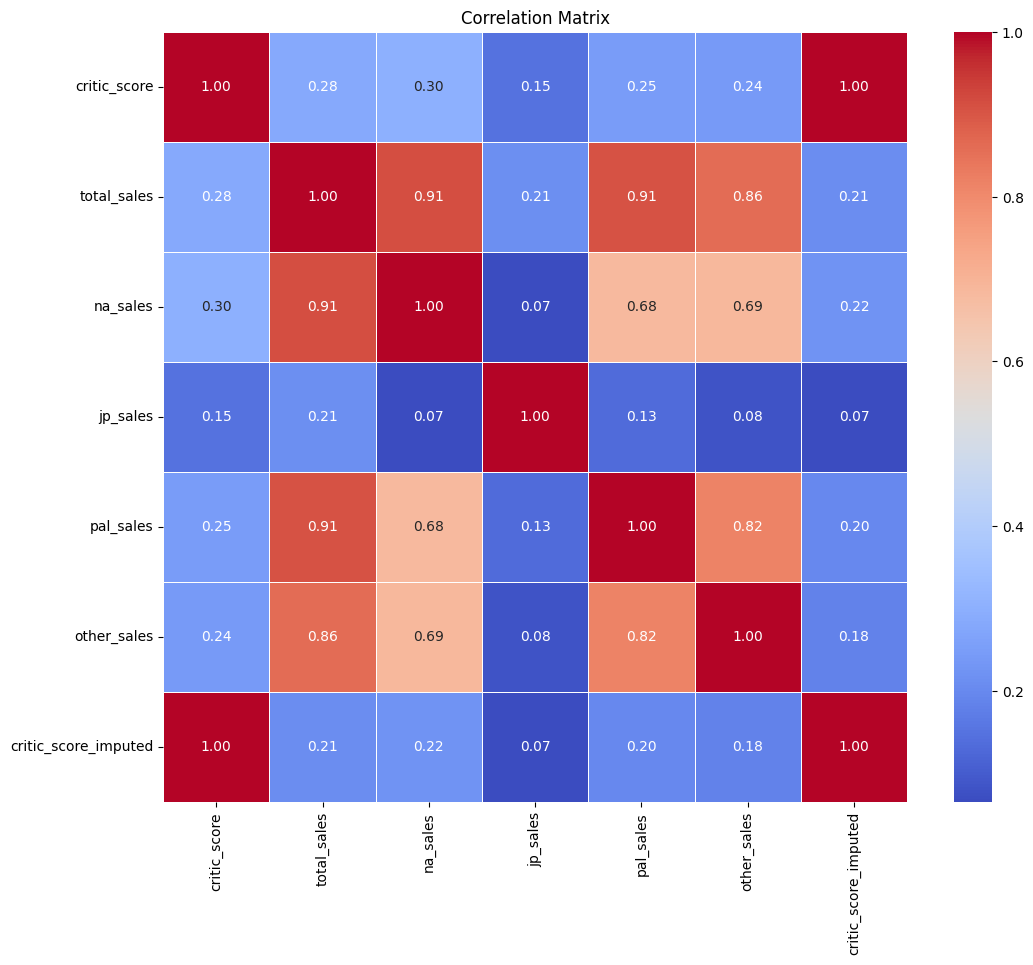


Variables Strongly Correlated with Total Sales:
total_sales             1.000000
na_sales                0.914149
pal_sales               0.907421
other_sales             0.859329
critic_score            0.281166
jp_sales                0.212469
critic_score_imputed    0.209954
Name: total_sales, dtype: float64


In [26]:

df_filtered_sales = df[df['total_sales'].notnull()]

numeric_columns = df_filtered_sales.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_filtered_sales[numeric_columns]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

sales_correlations = correlation_matrix['total_sales'].sort_values(ascending=False)
print("\nVariables Strongly Correlated with Total Sales:")
print(sales_correlations)


# Data Cleaning and Preprocessing:

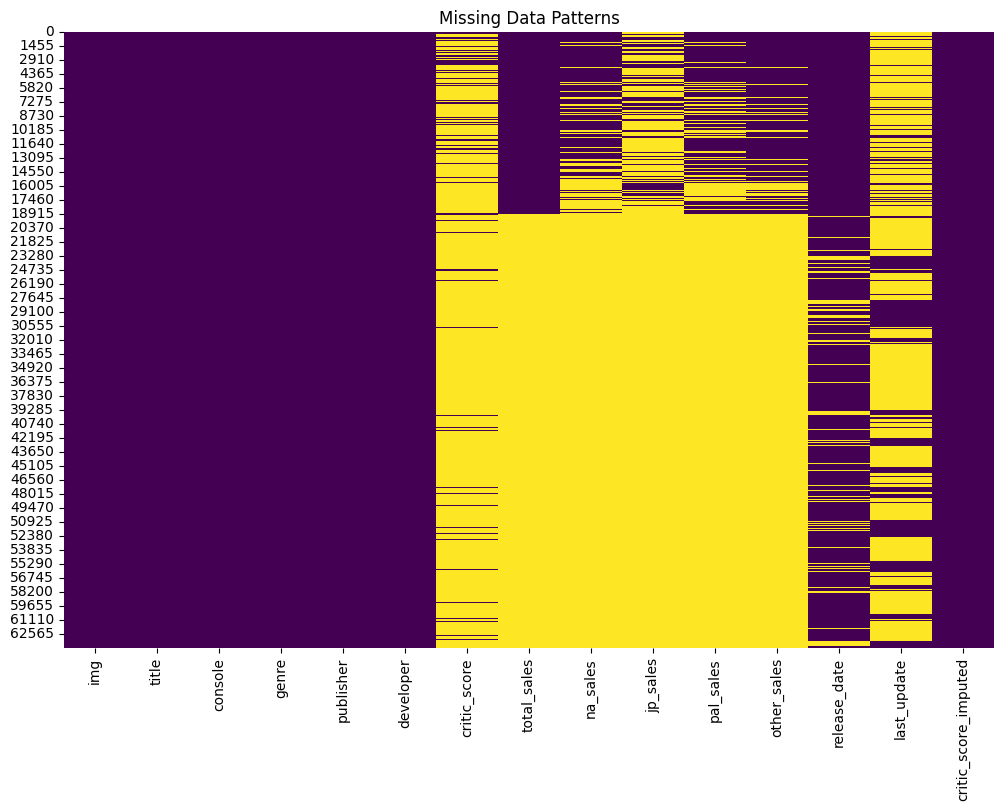

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 1 to 15044
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   img                   690 non-null    object        
 1   title                 690 non-null    object        
 2   console               690 non-null    object        
 3   genre                 690 non-null    object        
 4   publisher             690 non-null    object        
 5   developer             690 non-null    object        
 6   critic_score          690 non-null    float64       
 7   total_sales           690 non-null    float64       
 8   na_sales              690 non-null    float64       
 9   jp_sales              690 non-null    float64       
 10  pal_sales             690 non-null    float64       
 11  other_sales           690 non-null    float64       
 12  release_date          690 non-null    datetime64[ns]
 13  last_update           6

/tmp/ipykernel_18/3852933912.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_date'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_18/3852933912.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['release_date'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_18/3852933912.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
T

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Patterns')
plt.show()
imputer = SimpleImputer(strategy='mean')
df['critic_score'] = imputer.fit_transform(df[['critic_score']])
df['release_date'].fillna(method='ffill', inplace=True)
df['developer'].fillna('Unknown', inplace=True)
df['total_sales'].interpolate(method='linear', inplace=True)
df.dropna(axis=0, inplace=True)

print(df.info())


In [28]:
from sklearn.preprocessing import LabelEncoder
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')
label_encoder = LabelEncoder()
df['console_encoded'] = label_encoder.fit_transform(df['console'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 1 to 15044
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   img                   690 non-null    object        
 1   title                 690 non-null    object        
 2   console               690 non-null    object        
 3   genre                 690 non-null    object        
 4   publisher             690 non-null    object        
 5   developer             690 non-null    object        
 6   critic_score          690 non-null    float64       
 7   total_sales           690 non-null    float64       
 8   na_sales              690 non-null    float64       
 9   jp_sales              690 non-null    float64       
 10  pal_sales             690 non-null    float64       
 11  other_sales           690 non-null    float64       
 12  release_date          690 non-null    datetime64[ns]
 13  last_update           6

In [29]:
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,critic_score_imputed,console_encoded
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,9.70000,9
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,8.10000,9
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.80000,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,9.80000,9
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.40000,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07,8.40000,14
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.00000,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07,8.00000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,/games/boxart/full_9635491AmericaFrontccc.jpg,God Wars: Future Past,PSV,Role-Playing,NIS America,Kadokawa Games,7.22044,0.05,0.01,0.03,0.00,0.00,2017-06-20,2018-09-17,7.22044,11
13169,/games/boxart/full_362126AmericaFrontccc.jpg,NAtURAL DOCtRINE,PS3,Role-Playing,NIS America,Kadokawa Games,7.22044,0.05,0.03,0.01,0.01,0.01,2014-09-30,2018-11-23,7.22044,8
13198,/games/boxart/full_5198003AmericaFrontccc.jpg,GrimGrimoire,PS2,Strategy,NIS America,Vanillaware,7.70000,0.05,0.01,0.03,0.01,0.00,2007-06-26,2019-01-10,7.70000,7
13642,/games/boxart/full_6090603AmericaFrontccc.jpg,Arcana Heart 3: Love Max!!!!!,PSV,Fighting,Aksys Games,Examu Inc.,7.22044,0.04,0.02,0.02,0.00,0.01,2014-09-23,2019-04-25,7.22044,11


# Geographical Analysis:


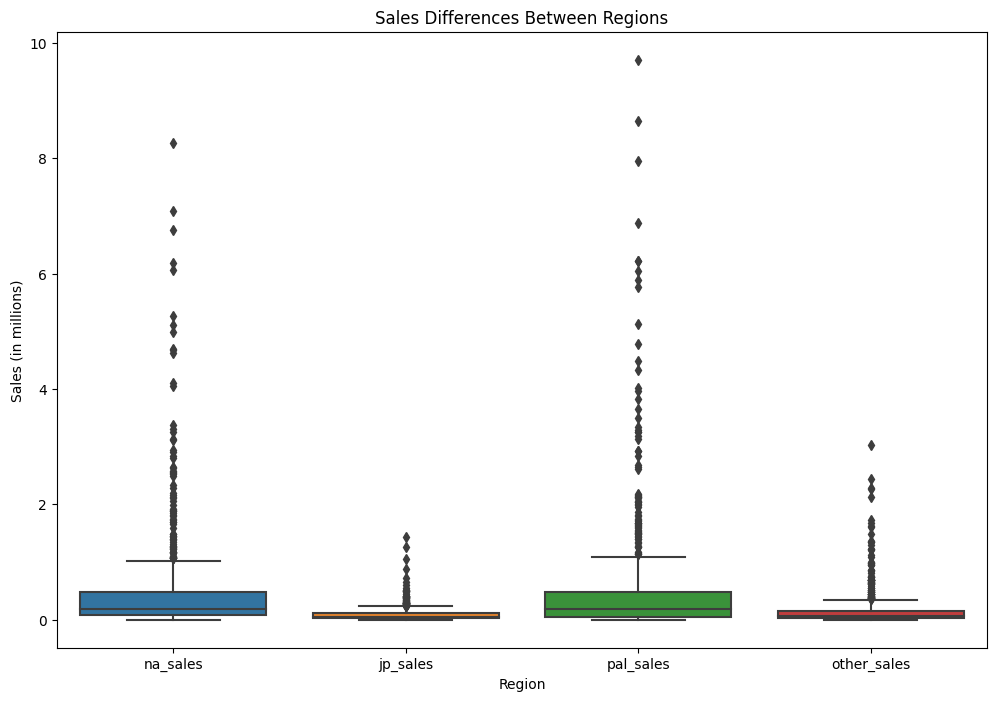

Top Genres in North America:
genre
Shooter             125.03
Action               52.93
Sports               36.59
Action-Adventure     35.96
Role-Playing         34.49
Name: na_sales, dtype: float64
Top Consoles in North America:
console
PS4     132.21
X360     72.25
PS3      56.06
XOne     38.76
3DS      10.88
Name: na_sales, dtype: float64


In [30]:
df_filtered_sales = df[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].dropna()
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered_sales[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']])
plt.title('Sales Differences Between Regions')
plt.ylabel('Sales (in millions)')
plt.xlabel('Region')
plt.show()
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_genres_pal = df.groupby('genre')['pal_sales'].sum().sort_values(ascending=False).head(5)
top_genres_other = df.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)
top_consoles_na = df.groupby('console')['na_sales'].sum().sort_values(ascending=False).head(5)
top_consoles_jp = df.groupby('console')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_consoles_pal = df.groupby('console')['pal_sales'].sum().sort_values(ascending=False).head(5)
top_consoles_other = df.groupby('console')['other_sales'].sum().sort_values(ascending=False).head(5)
print("Top Genres in North America:")
print(top_genres_na)

print("Top Consoles in North America:")
print(top_consoles_na)



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


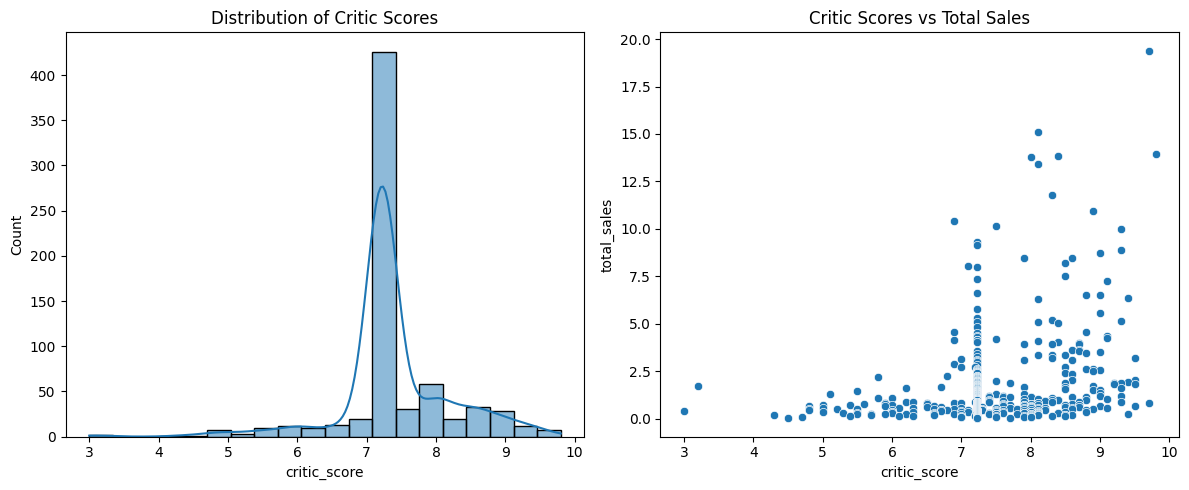

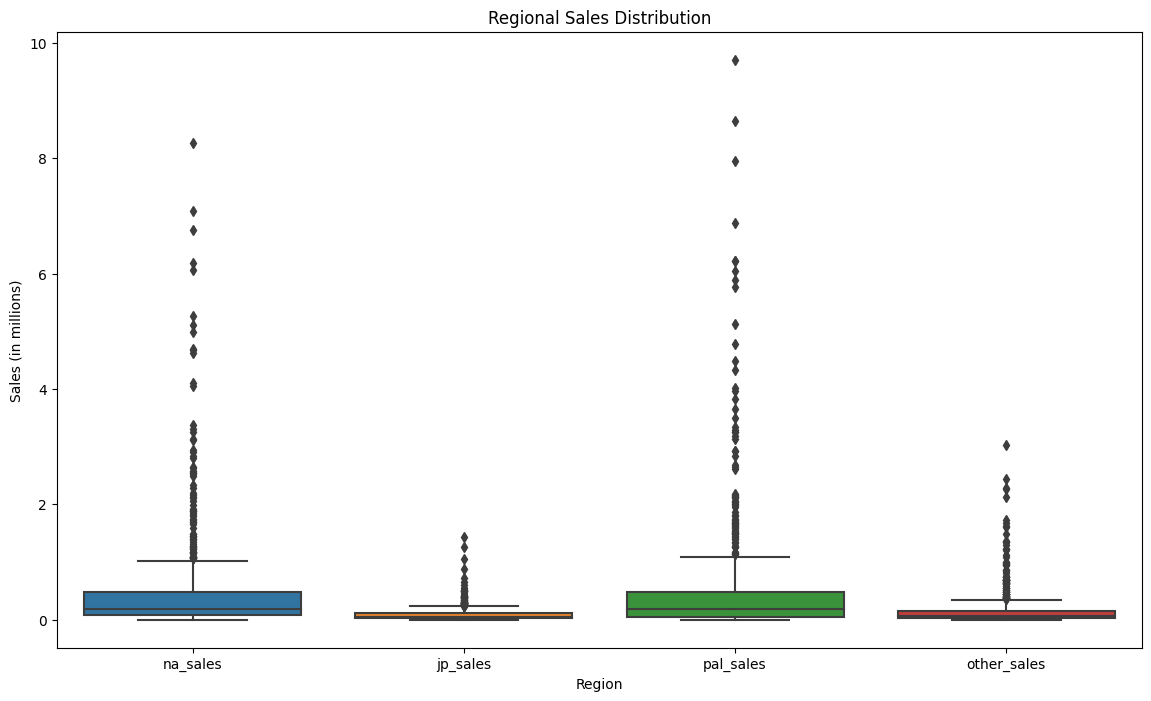

In [31]:

df_filtered_sales = df[['total_sales', 'critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].dropna()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered_sales['critic_score'], bins=20, kde=True)
plt.title('Distribution of Critic Scores')
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=df_filtered_sales)
plt.title('Critic Scores vs Total Sales')
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 8))
sns.boxplot(x='variable', y='value', data=pd.melt(df_filtered_sales[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']]))
plt.title('Regional Sales Distribution')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.show()
